# Case FortBrasil
***

###  **Legenda:**
- **ID_CONTA:** Identificador da conta;
- **DT_ACORDO:** Data do acordo;
- **NU_DIAS_ATRASO:** Número de dias após o vencimento que esse cliente está sem pagar;
- **VALOR_CRELIQ:** Valor da dívida do cliente quando ele ultrapassa os 65 dias de atraso;
- **DIVIDA_ATUAL:** Dívida atualizada com juros;
- **RESPOSTA:** Se for 1, significa que o cliente aderiu aquele acordo. Ou seja, efetuou o pagamento da entrada. Se for 0, caso contrário. 
- **QTD_PARCELAMENTO_XM:** Quantidade de parcelamentos de fatura aderidos X meses antes da fatura que ele deixou de pagar.
- **LIMITE:** Limite total do cliente;
- **QTD_EXTRATOS:** Quantidade de Faturas emitidas;
- **QTD_FX0:** Quantidade de faturas emitidas em dia;
- **QTD_FX1:** Quantidade de faturas emitidas no qual o cliente não pagou a fatura do mês anterior;
- **QTD_FX2:** Quantidade de faturas emitidas no qual o cliente não pagou as duas ultimas faturas anteriores;
- **QTD_ACIONAMENTO:** Quantidade de vezes que ligamos para os clientes para cobrar a sua dívida;
- **QTD_CP:** Quantidade de vezes que a ligação foi atendida, mas não houve contato com o cliente;
- **QTD_CPC:** Quantidade de vezes que o próprio cliente atendeu a ligação de cobrança.
- **DEFINIÇÃO:** Acordo é uma proposta de negociação da dívida por parte da Fortbrasil para clientes que estão com mais de 180 dias de atraso.

## Questão 02
### 2.1. Qual o percentual de adesão mensal por faixa de atraso (Histórico)?
***

### Importação das bibliotecas
Seleção de bibliotecas para manipulação de dados, criação de gráficos e tradução dos meses a serem usados do inglês para o português.

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
import locale

In [19]:
try:
    locale.setlocale(locale.LC_ALL, 'pt_BR')
except:
    locale.setlocale(locale.LC_ALL, 'Portuguese_Brazil')

### Leitura da base de dados

Repare que nos é fornecido 5 bases de dados, no entanto, para essa questão, usaremos apenas a base de dados 1, pois é nela que encontraremos as principais colunas para a solucionar o que se pede.

In [20]:
df_inicial = pd.read_csv('Questão 2 - Base 1.txt', sep = "\t")
df_inicial.head()

,ID_CONTA,DT_ACORDO,NU_DIAS_ATRASO,VALOR_CRELIQ,DIVIDA_ATUAL,RESPOSTA
0,1194908,2018-11-22,221,324.38,463.73,0
1,1447997,2018-11-22,191,334.82,451.56,1
2,1035415,2018-11-22,252,1682.26,2554.18,0
3,1069434,2018-11-22,231,1625.01,2368.65,0
4,1427566,2018-11-22,270,320.07,503.25,0


### Verificação de NaN
É sempre interessante que tratemos os NaN, pois eles interferem em nossa modelagem de dados. Para esse caso, não foi encontrado nenhum.

In [21]:
# Sem registros de NaN nas colunas
df_inicial.isna().sum()

ID_CONTA          0
DT_ACORDO         0
NU_DIAS_ATRASO    0
VALOR_CRELIQ      0
DIVIDA_ATUAL      0
RESPOSTA          0
dtype: int64

## Solução


### 1. Filtrar colunas importantes a serem usadas 

Após o tratamento dos dados, devemos selecionar a(s) informação(ões) útil(eis) para a manipulação dos dados. Assim, de acordo com o enunciado, precisamos apenas do mês da fatura emitida e dos clientes que não pagaram a fatura anterior.

In [22]:
df_filtrado = df_inicial[['DT_ACORDO','NU_DIAS_ATRASO','RESPOSTA']]
df_filtrado.head()

,DT_ACORDO,NU_DIAS_ATRASO,RESPOSTA
0,2018-11-22,221,0
1,2018-11-22,191,1
2,2018-11-22,252,0
3,2018-11-22,231,0
4,2018-11-22,270,0


### 2. Verificar os tipos dos dados das colunas
A fase de verificação dos tipos dos dados do dataset é importante, pois temos como objetivo o percentual de **adesão mensal** por faixa de atraso, ou seja, necessitaremos filtrar as datas presentes na coluna 'DT_ACORDO' e isso só é possível quando temos o datetime como tipo de dado.

In [23]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72533 entries, 0 to 72532
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DT_ACORDO       72533 non-null  object
 1   NU_DIAS_ATRASO  72533 non-null  int64 
 2   RESPOSTA        72533 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


### 3. Transformação object em datetime
Com base no tópico 2, constatamos que a coluna 'DT_ACORDO' é do tipo object. Dessa maneira, devemos transformá-la em datetime.

In [24]:
df_filtrado['DT_ACORDO'] = pd.to_datetime(df_filtrado['DT_ACORDO'])
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72533 entries, 0 to 72532
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DT_ACORDO       72533 non-null  datetime64[ns]
 1   NU_DIAS_ATRASO  72533 non-null  int64         
 2   RESPOSTA        72533 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.7 MB


**A fim de tornar a visualização das datas mais fácil, devemos aplicar uma função lâmbda que ajusta o padrão data 'ano - mês - dia' para 'mês - ano'**

In [25]:
df_filtrado['DT_ACORDO'] = df_filtrado['DT_ACORDO'].apply(lambda x: x.strftime("%B - %Y"))
df_filtrado.head()

,DT_ACORDO,NU_DIAS_ATRASO,RESPOSTA
0,novembro - 2018,221,0
1,novembro - 2018,191,1
2,novembro - 2018,252,0
3,novembro - 2018,231,0
4,novembro - 2018,270,0


### 4. Verificar a faixa total de atraso (min e max)

Devemos verificar os valores mínimos e máximos dos dias de atraso, pois temos como objetivo calcular o percentual de adesão mensal por **faixa de atraso**. Ou seja, a partir desses extremos, seremos capazes de coletar dados dentro de faixas de atraso menores para, no fim, somarmos os valores encontrados, obtendo a faixa total.

In [26]:
df_filtrado['NU_DIAS_ATRASO'].describe()

count    72533.000000
mean       326.609640
std         97.165081
min        181.000000
25%        245.000000
50%        311.000000
75%        400.000000
max        540.000000
Name: NU_DIAS_ATRASO, dtype: float64

### 5. Definir as faixas menores de atrasos
Com base no que foi dito no item 4, encontramos os seguintes valores:

**mínimo: 181**


**máximo: 540**


Assim, podemos definir um intervalo de dados. Para esse caso, usaremos um intervalo de **100**

In [27]:
faixas_atraso = ['181 - 281', '282 - 382', '383 - 483', 'Maior que 484']

**Criação de função que verifica cada valor presente na coluna 'NU_DIAS_ATRASO' e que gera a faixa correspondente a cada um.**

In [34]:
def intervalos_faixa(NU_DIAS_ATRASO):
    # quando o 'NU_DIAS_ATRASO' possui valor de 181 a 281, registra na coluna a faixa '181 - 281'
    if NU_DIAS_ATRASO >= 181 and NU_DIAS_ATRASO <= 281:
        return '181 - 281'
    # quando o 'NU_DIAS_ATRASO' possui valor de 282 a 382, registra na coluna a faixa '282 - 382'
    elif NU_DIAS_ATRASO >= 282 and NU_DIAS_ATRASO <= 382:
        return '282 - 382'
    # quando o 'NU_DIAS_ATRASO' possui valor de 383 a 483, registra na coluna a faixa '383 - 483'
    elif NU_DIAS_ATRASO >= 383 and NU_DIAS_ATRASO <= 483:
        return '383 - 483'
    # quando o 'NU_DIAS_ATRASO' possui valor acima de 484 (com máximo 540), registra na coluna a faixa 'Maior que 484'
    else:
        return 'Maior que 484'

df_filtrado['INTERVALOS_DEFINIDOS'] = df_filtrado['NU_DIAS_ATRASO'].apply(lambda x: intervalos_faixa(x))
df_filtrado

,DT_ACORDO,NU_DIAS_ATRASO,RESPOSTA,INTERVALOS_DEFINIDOS
0,novembro - 2018,221,0,181 - 281
1,novembro - 2018,191,1,181 - 281
2,novembro - 2018,252,0,181 - 281
3,novembro - 2018,231,0,181 - 281
4,novembro - 2018,270,0,181 - 281
...,...,...,...,...
72528,junho - 2019,405,0,383 - 483
72529,junho - 2019,242,0,181 - 281
72530,junho - 2019,293,0,282 - 382
72531,junho - 2019,191,0,181 - 281


### 6. Porcentagem:
Por fim, chegamos ao resultado aguardado da questão.

In [37]:
#Criação de um novo DataFrame para passar os dados desejados
df_adesao_mensal = pd.DataFrame()

#Criação de variável de filtro
condicao = (df_filtrado['RESPOSTA'] == 1)

#Criação do cálculo da porcentagem para cada faixa
df_adesao_mensal['181 - 281'] = round((df_filtrado[condicao & (df_filtrado['INTERVALOS_DEFINIDOS'] == '181 - 281')].groupby('DT_ACORDO')['RESPOSTA'].count())/df_filtrado.groupby('DT_ACORDO')['RESPOSTA'].count(),4)*100
df_adesao_mensal['282 - 382'] = round((df_filtrado[condicao & (df_filtrado['INTERVALOS_DEFINIDOS'] == '282 - 382')].groupby('DT_ACORDO')['RESPOSTA'].count())/df_filtrado.groupby('DT_ACORDO')['RESPOSTA'].count(),4)*100
df_adesao_mensal['383 - 483'] = round((df_filtrado[condicao & (df_filtrado['INTERVALOS_DEFINIDOS'] == '383 - 483')].groupby('DT_ACORDO')['RESPOSTA'].count())/df_filtrado.groupby('DT_ACORDO')['RESPOSTA'].count(),4)*100
df_adesao_mensal['Maior que 484'] = round((df_filtrado[condicao & (df_filtrado['INTERVALOS_DEFINIDOS'] == 'Maior que 484')].groupby('DT_ACORDO')['RESPOSTA'].count())/df_filtrado.groupby('DT_ACORDO')['RESPOSTA'].count(),4)*100

#Colocação do índice da tabela
df_adesao_mensal.reset_index(inplace=True)

#Chamada da tabela
df_adesao_mensal

,DT_ACORDO,181 - 281,282 - 382,383 - 483,Maior que 484
0,abril - 2019,14.43,12.21,5.92,2.34
1,junho - 2019,1.47,0.93,0.55,0.15
2,março - 2019,0.39,0.40,0.44,0.14
3,novembro - 2018,2.11,1.15,NaN,NaN


**Perceba que temos NaN a serem tratados. Para esse caso em específico, podemos trocar os NaN por 0, pois a indicativa de NaN é apenas a de inexistência de adesão mensal naquela daixa de dado.**

In [38]:
df_adesao_mensal.fillna(0, inplace = True)
df_adesao_mensal

,DT_ACORDO,181 - 281,282 - 382,383 - 483,Maior que 484
0,abril - 2019,14.43,12.21,5.92,2.34
1,junho - 2019,1.47,0.93,0.55,0.15
2,março - 2019,0.39,0.40,0.44,0.14
3,novembro - 2018,2.11,1.15,0.00,0.00


**Agora, basta que somameos as porcentagens de cada faixa, criando uma nova coluna '% de Adesão Mensal' que corresponderá às porcentagens totais desejadas.**

In [39]:
df_adesao_mensal['% de Adesão Mensal'] = df_adesao_mensal['181 - 281'] + df_adesao_mensal['282 - 382'] + df_adesao_mensal['383 - 483'] + df_adesao_mensal['Maior que 484']
df_adesao_mensal

,DT_ACORDO,181 - 281,282 - 382,383 - 483,Maior que 484,% de Adesão Mensal
0,abril - 2019,14.43,12.21,5.92,2.34,34.90
1,junho - 2019,1.47,0.93,0.55,0.15,3.10
2,março - 2019,0.39,0.40,0.44,0.14,1.37
3,novembro - 2018,2.11,1.15,0.00,0.00,3.26


### 7. Representação gráfica

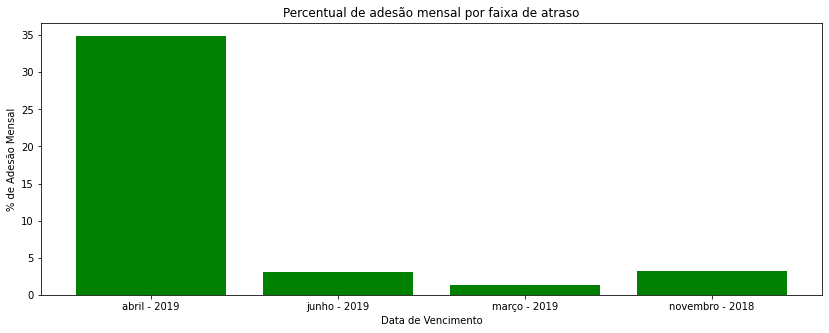

In [45]:
# Gráfico
#Difinição do tamanho do gráfico
plt.figure(figsize = (14,5))

#Definição dos dados dos eixos
plt.bar(df_adesao_mensal['DT_ACORDO'], df_adesao_mensal['% de Adesão Mensal'], color = 'green')

#Legenda de cada barra do eixo x
plt.xticks(df_adesao_mensal['DT_ACORDO'])

#Label para eixo y
plt.ylabel('% de Adesão Mensal')

#Label para eixo x
plt.xlabel('Data de Vencimento')

#Título do gráfico
plt.title('Percentual de adesão mensal por faixa de atraso')

plt.show()

### 2.2. Qual modelo preditivo você utilizaria para traçar uma estratégia objetivando o aumento da adesão dos acordos? (Descreva a técnica utilizada)
***

Quando se trata de tomada de decisão a partir de dados já conhecidos (como é o caso do nosso cenário), devemos escolher um modelo preditivo de classificação. Pensando no que mais contribuiria para um plano estratégico que atinja o objetivo da questão, devemos escolher o modelo de classificação de **Árvore de Decisão**.


**Técnica utiliza:** como o nome sugere, o algoritmo de árvore de decisão irá criar diversos pontos, chamados de "nós" da árvore, tal que cada um deles registrará um resultado de decisão a fim de seguir um novo caminho. Tais novos caminhos são chamados de "ramos". De maneira simples, podemos pensar na Árvore de Decisão como sucessivas perguntas que recebem respostas "sim" ou "não", até que todos os dados sejam usados e/ou todos os grupos de dados sejam criados. Assim, toda a árvore será construída, partindo de um ponto comum e podendo existir várias opções de caminhos diferentes a serem percorridos na árvore, em que cada um leva a um resultado.

**Por que escolher essa técina:** é interessante escolhermos esse tipo de modelo, pois a medida que as decisões são tomadas, novos grupos de perfis de usuários são traçados, ajudando-nos a entender cada vez mais as possibilidades de um usuários aderir ou não os acordos, em quais faixas de atraso os usuários costumam pagar mais, dentre outros. 

**Como montar uma estratégia a partir desse modelo:** para pensarmos em uma estratégia, devemos ter em mente dois recursos bases: gráfico de faixa de atraso e árvore de decisão. De acordo com o gráfico percentual da questão 2.1, perceba que usuários que possuem menores faixas de atraso possuem maiores chances de pagarem.

Pensando nisso, como uma estratégia de aumento de adesão, podemos criar um mecanismo de descontos decrescentes por faixa de atraso, ou seja, descontos de '181 - 281' > descontos de '282 - 382' > descontos de '383 - 483' > descontos de 'Maior que 484' incentivando os usuários a pagarem bem antes as parcelas em atraso.

### 2.3. Quais indicadores e ferramentas você utilizaria para avaliar a performance/aderência desse modelo? (Descreva os indicadores utilizados)
***

Quando se trata de Machine Learning, devemos seguir algumas métricas de avaliação, sendo elas:

**Matriz de Confusão:** a matriz de confusão deve indicar quantos exemplos existem em cada grupo, sendo eles: falso positivo (FP), falso negativo (FN), verdadeiro positivo (TP) e verdadeiro negativo (TN). É importante conseguir visualizar a contagem de cada grupo de forma absoluta e de forma percentual de classe real, já que o número de exemplos em cada classe pode variar, pois é a partir dessa contagem que constataremos se a classificação ocorreu corretamente ou erroneamente em cada classe, ajudando a entender se o modelo está favorecendo uma classe em detrimento da outra.

**Precisão:** a precisão indica quantos exemplos dados como classificados em positivos são, de fato, positivos. Essa garantia trás mais segurança ao modelo de escolhido. Esta métrica é definida pela razão entre a quantidade de exemplos classificados corretamente como positivos e o total de exemplos classificados como positivos

                                                Precisão = TP/(TP + FP)

**Revocação:** no caso da rovocação, teremos uma ênfase contrária à precisão, ou seja, focará nos erros dados como falso negativos. Esta métrica é definida pela razão entre a quantidade de exemplos classificados corretamente como positivos e a quantidade de exemplos que são, de fato, positivos

                                                Revocação = TP/(TP + FN)

**Score F1:** um modelo que se utiliza do Score F1 é capaz de acertar as predições e de recuperar os exemplos de classe de interesse, ou seja, essa métrica tende a ser um resumo melhor da qualidade do modelo. Ela é definida pela média harmônica entre a precisão e a revocação
                               Score F1 = 2*[(precisão*revocação)/(precisão+revocação)]

Portanto, utilizaria tais métricas para garantir que o modelo escolhido é o mais eficiente.